In [ ]:
## 1. PROBLEM STATEMENT

In [107]:
# A Portuguese banking institution has collected data about their clients and they now want to use this data to design their marketing campaigns for maximum profit. 
# The product being sold is a term deposit (Fixed Deposit).

In [ ]:
## 2. DATA PREPROCESSING

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
plt.style.use('dark_background')

In [109]:
df = pd.read_csv('train.csv', sep=',')

In [110]:
df.head()

,id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,1,57,services,married,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,5,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32978 entries, 0 to 32977
Data columns (total 22 columns):
id                32978 non-null int64
age               32978 non-null int64
job               32978 non-null object
marital           32978 non-null object
education         32978 non-null object
default           32978 non-null object
housing           32978 non-null object
loan              32978 non-null object
contact           32978 non-null object
month             32978 non-null object
day_of_week       32978 non-null object
duration          32978 non-null int64
campaign          32978 non-null int64
pdays             32978 non-null int64
previous          32978 non-null int64
poutcome          32978 non-null object
emp.var.rate      32978 non-null float64
cons.price.idx    32978 non-null float64
cons.conf.idx     32978 non-null float64
euribor3m         32978 non-null float64
nr.employed       32978 non-null float64
y                 32978 non-null object
dtypes: floa

In [127]:
df.drop('duration', axis=1, inplace=True)
# Drop the duration column as all the data in it is non-existent.

In [112]:
df['y'].replace(['no'],0,inplace=True)
df['y'].replace(['yes'],1,inplace=True)

In [ ]:
## 3. EXPLORATORY DATA ANALYSIS

Text(0, 0.5, 'No. of customers')

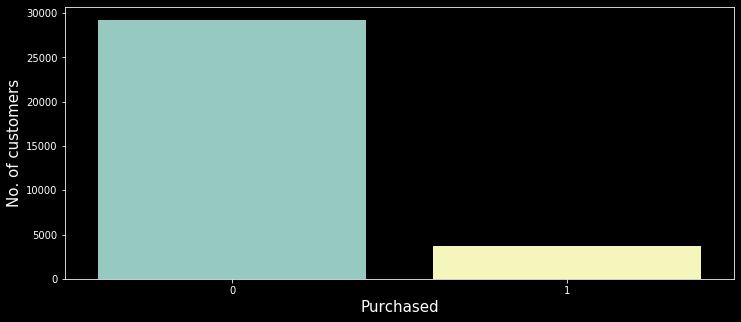

In [113]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='y', data=df)
ax.set_xlabel('Purchased', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [172]:
perc = df['y'].sum()/32978
perc = perc*100
print('Percentage of Customers who purchased the Deposit=' + str(perc) + "%")

Percentage of Customers who purchased the Deposit=11.331796955546123%


In [114]:
# As we can see that most targeted customers are not buying the term deposit indicating that the wrong customers are being targeted in the campaign.
# This will cause a lot of loss to the company in terms of money spent in marketing.
# Only 11% of customers were targeted accurately.

Text(0, 0.5, 'No. of customers')

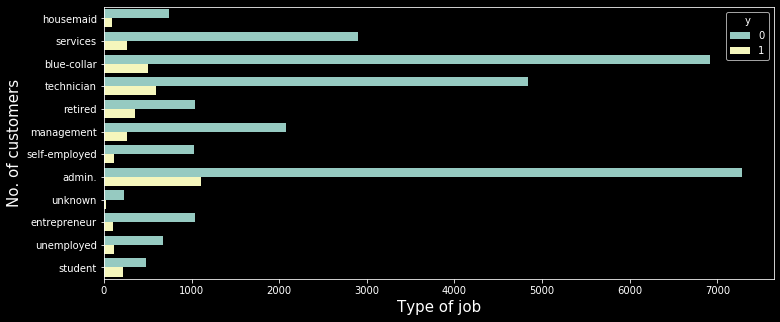

In [115]:
plt.figure(figsize=(12,5))
ax = sns.countplot(y='job', data=df, hue='y')
ax.set_xlabel('Type of job', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [116]:
# Most customers who purchased the term deposit work as Admins.

Text(0, 0.5, 'No. of customers')

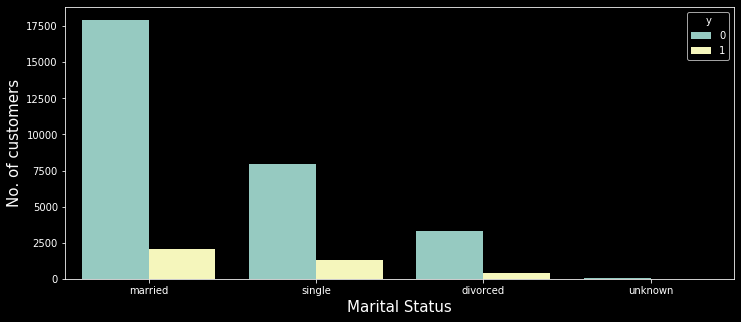

In [117]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='marital', data=df, hue='y')
ax.set_xlabel('Marital Status', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [118]:
# Most customers who purchased the term deposit married.

Text(0, 0.5, 'No. of customers')

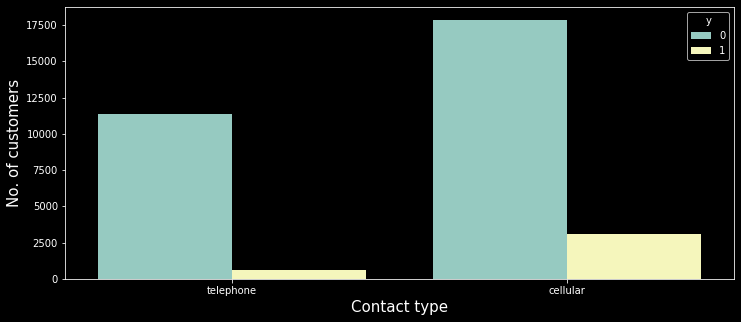

In [119]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='contact',data=df, hue='y')
ax.set_xlabel('Contact type', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [120]:
# Most customers who purchased the term deposit have been contacted on a cellular connection.

Text(0, 0.5, 'No. of customers')

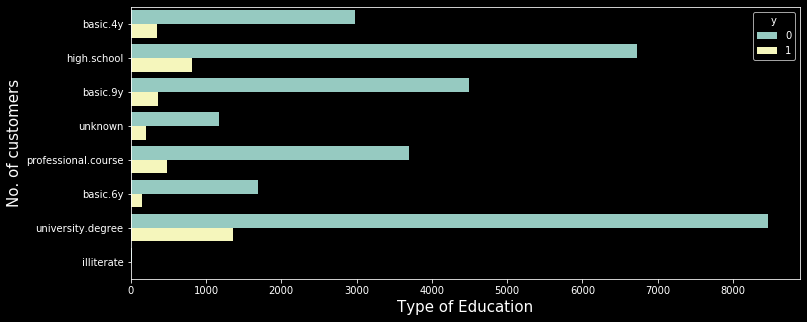

In [121]:
plt.figure(figsize=(12,5))
ax = sns.countplot(y='education', data=df, hue='y')
ax.set_xlabel('Type of Education', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [122]:
# Majority customers who purchased the term deposit have university degrees.

Text(0, 0.5, 'No. of customers')

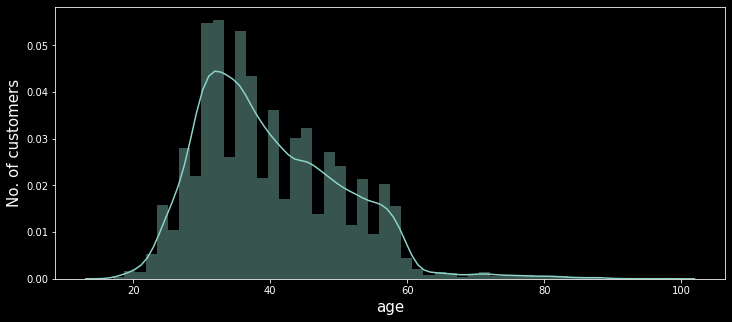

In [123]:
plt.figure(figsize=(12,5))
ax = sns.distplot(a=df['age'])
ax.set_xlabel('age', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [124]:
df.groupby('y').median()

,id,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,
0,19162,38,164,2,999,0,1.1,93.918,-41.8,4.857,5195.8
1,35607,37,445,2,999,0,-1.8,93.200,-40.4,1.266,5099.1


In [125]:
# Most of the customers are around the age of 37-38.

Text(0, 0.5, 'Months')

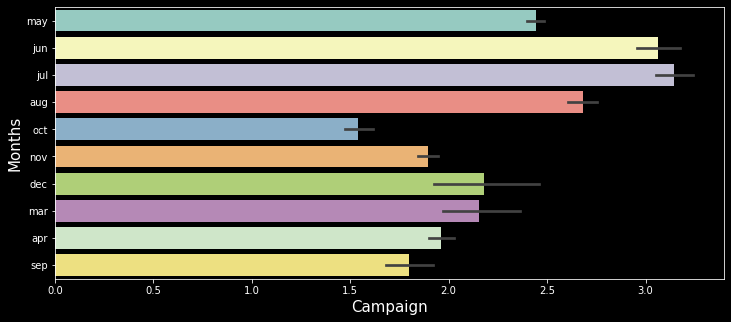

In [126]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x='campaign',y='month', data=df)
ax.set_xlabel('Campaign', fontsize=15)
ax.set_ylabel('Months', fontsize=15)

In [ ]:
# The campaign went on for most part of the year.

Text(0, 0.5, 'No. of customers')

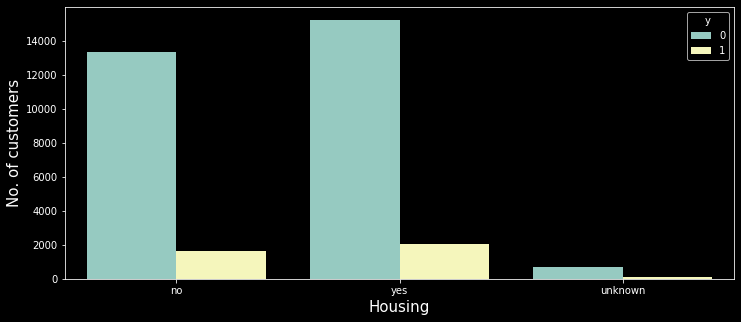

In [163]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='housing', data=df, hue='y')
ax.set_xlabel('Housing', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

Text(0, 0.5, 'No. of customers')

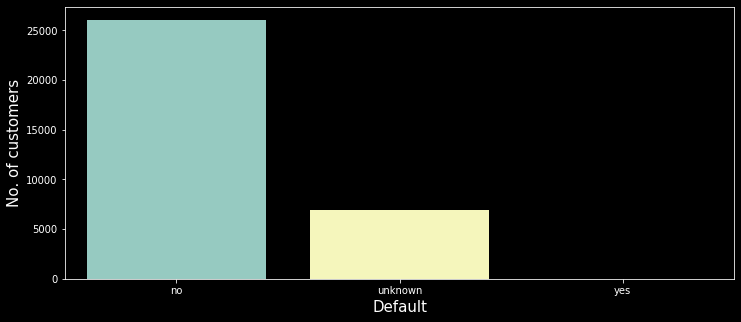

In [168]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='default', data=df)
ax.set_xlabel('Default', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

Text(0, 0.5, 'No. of customers')

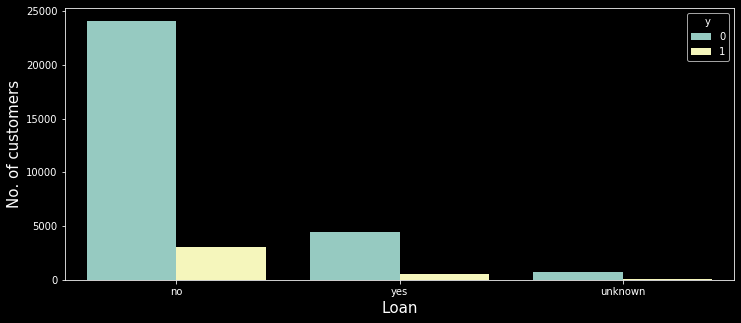

In [167]:
plt.figure(figsize=(12,5))
ax = sns.countplot(x='loan', data=df, hue='y')
ax.set_xlabel('Loan', fontsize=15)
ax.set_ylabel('No. of customers', fontsize=15)

In [ ]:
# Most customers who purchased the Term deposit did not have any loans.

In [ ]:
## 4. MODELLING APPROACHES

In [146]:
# We will be using a SVM (Structured Vector Machine) Model for our data prediction.
# First we'll do some more processing of our data so it is ready to be fed in the model.

In [128]:
df_with_dummies = pd.get_dummies(file_data, drop_first=True).astype(np.float32)

In [129]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32978 entries, 0 to 41187
Data columns (total 54 columns):
age                              32978 non-null float32
duration                         32978 non-null float32
campaign                         32978 non-null float32
pdays                            32978 non-null float32
previous                         32978 non-null float32
emp.var.rate                     32978 non-null float32
cons.price.idx                   32978 non-null float32
cons.conf.idx                    32978 non-null float32
euribor3m                        32978 non-null float32
nr.employed                      32978 non-null float32
job_blue-collar                  32978 non-null float32
job_entrepreneur                 32978 non-null float32
job_housemaid                    32978 non-null float32
job_management                   32978 non-null float32
job_retired                      32978 non-null float32
job_self-employed                32978 non-null flo

In [130]:
df_drop = df_with_dummies.drop('default_yes', axis=1, inplace=True)

In [131]:
X = df_with_dummies.iloc[:, :-1].values
y = df_with_dummies.iloc[:, -1].values

In [132]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
# We'll split our dataset into training and testing datasets.
# The testing dataset will be used to check the accuracy of our model.
# We'll keep 90% data for training and 10% for testing.

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2, stratify=y)

In [154]:
model = SVC(gamma='auto')

In [ ]:
# Now we'll train our SVM using the training dataset.

In [155]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [156]:
y_pred = model.predict(X_test)

In [157]:
print(classification_report(y_pred, y_test))
print(accuracy_score(y_pred, y_test), '\n')

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      3092
         1.0       0.39      0.71      0.50       206

    accuracy                           0.91      3298
   macro avg       0.68      0.82      0.73      3298
weighted avg       0.94      0.91      0.92      3298

0.9126743480897513 



In [152]:
# Our model has got a pretty decent accuracy of 91%.

In [ ]:
# Now we'll run the model on the given problem statement data on which we have to make predictions.

In [138]:
df2 = pd.read_csv('test.csv', sep=',')

In [139]:
df2.drop('duration', axis=1, inplace=True)

In [140]:
df_with_dummies2 = pd.get_dummies(df2, drop_first=True).astype(np.float32)

In [141]:
X2 = df_with_dummies2.iloc[:, :].values

In [142]:
scaler2 = StandardScaler()
scaler2.fit(X2)
X2 = scaler2.transform(X2)

In [159]:
## 6. RESULTS AND ANALYSIS

In [143]:
y_pred2 = model.predict(X2)

In [144]:
count=0
count_yes=0
count_no=0
for i in range(len(X2)):
    
    if y_pred2[i]==0:
        count_no+=1
    else:
        count_yes+=1
        
    count+=1
    
print("count=",count)
print("count_yes=",count_yes)
print("count_no=",count_no)

count= 8210
count_yes= 423
count_no= 7787


In [145]:
for i in range(len(X2)):
    if y_pred2[i]==0:
        print(str(df2.id[i]) + ",no")
    else:
        print(str(df2.id[i]) + ",yes")


3,no
6,no
10,no
11,no
13,no
16,no
20,no
21,no
24,no
28,no
29,no
43,no
47,no
49,no
61,no
62,no
68,no
73,no
75,no
78,no
80,no
85,no
87,no
88,no
91,no
93,no
94,no
101,no
113,no
116,no
131,no
132,no
133,no
136,no
139,no
142,no
143,no
144,no
149,no
157,no
159,no
161,no
163,no
165,no
167,no
170,no
178,no
184,no
189,no
192,no
201,no
208,no
221,no
222,no
224,no
226,no
238,no
254,no
255,no
264,no
265,no
270,no
271,no
275,no
278,no
287,no
289,no
291,no
292,no
295,no
296,no
297,no
307,no
309,no
311,no
328,no
330,no
334,no
335,no
336,no
345,no
350,no
365,no
381,no
385,no
389,no
394,no
395,no
405,no
413,no
414,no
425,no
427,no
428,no
435,no
440,no
442,no
446,no
447,no
449,no
460,no
463,no
468,no
469,no
483,no
484,no
491,no
494,no
501,no
503,no
504,no
510,no
515,no
525,no
529,no
538,no
545,no
550,no
568,no
569,no
570,no
583,no
584,no
585,no
594,no
608,no
609,no
611,no
632,no
636,no
642,no
646,no
656,no
682,no
684,no
685,no
693,no
697,no
700,no
704,no
711,no
714,no
719,no
728,no
732,no
737,no
738,no


10927,no
10944,no
10955,no
10956,no
10959,no
10964,no
10974,no
10975,no
10989,no
10991,no
10994,no
10995,no
10996,no
10998,no
10999,no
11000,no
11008,no
11012,no
11013,no
11014,no
11018,no
11030,no
11041,no
11045,no
11050,no
11053,no
11061,no
11074,no
11075,no
11077,no
11084,no
11087,no
11099,no
11104,no
11113,no
11115,no
11120,no
11131,no
11132,no
11133,no
11146,no
11148,no
11151,no
11153,no
11166,no
11170,no
11172,no
11177,no
11186,no
11187,no
11195,no
11198,no
11199,no
11202,no
11212,no
11220,no
11225,no
11226,no
11229,no
11231,no
11232,no
11233,no
11242,no
11251,no
11253,no
11265,no
11271,no
11279,no
11285,no
11286,no
11288,no
11306,no
11307,no
11322,no
11323,no
11340,no
11341,no
11349,no
11353,no
11354,no
11357,no
11359,no
11360,no
11364,no
11378,no
11383,no
11385,no
11389,no
11400,no
11401,no
11405,no
11406,no
11418,no
11426,no
11427,no
11437,no
11442,no
11443,no
11446,no
11450,no
11451,no
11460,no
11464,no
11466,no
11473,no
11478,no
11486,no
11493,no
11494,no
11496,no
11506,no
1

23546,no
23548,no
23561,no
23567,no
23571,no
23574,no
23581,no
23586,no
23593,no
23594,no
23595,no
23600,no
23602,no
23609,no
23614,no
23619,no
23621,no
23628,no
23631,no
23632,no
23641,no
23648,no
23650,no
23665,no
23668,no
23673,no
23674,no
23679,no
23685,no
23686,no
23689,no
23694,no
23698,no
23703,no
23704,no
23706,no
23707,no
23714,no
23722,no
23724,no
23750,no
23757,no
23765,no
23772,no
23776,no
23777,no
23782,no
23786,no
23788,no
23789,no
23790,no
23798,no
23800,no
23811,no
23815,no
23818,no
23820,no
23825,no
23828,no
23829,no
23838,no
23841,no
23843,no
23844,no
23845,no
23856,no
23860,no
23862,no
23864,no
23865,no
23876,no
23877,no
23881,no
23884,no
23888,no
23901,no
23903,no
23909,no
23911,no
23919,no
23920,no
23929,no
23941,no
23943,no
23948,no
23951,no
23952,no
23956,no
23959,no
23971,no
23988,no
23990,no
23992,no
23997,yes
24007,yes
24015,yes
24018,yes
24025,yes
24026,yes
24031,no
24041,yes
24043,no
24057,yes
24059,yes
24063,yes
24065,no
24073,no
24086,no
24090,no
24103,no


35659,no
35660,no
35661,no
35669,no
35675,no
35686,no
35689,no
35695,no
35707,no
35711,no
35723,no
35737,no
35745,no
35750,no
35760,no
35774,no
35781,no
35785,no
35792,no
35793,no
35797,no
35807,no
35808,no
35811,no
35815,no
35819,no
35838,no
35843,no
35846,no
35851,no
35853,no
35866,no
35867,no
35870,no
35874,no
35876,no
35877,no
35885,no
35889,no
35891,no
35905,no
35909,no
35922,no
35925,no
35926,no
35930,no
35931,yes
35934,no
35952,no
35960,no
35962,no
35966,no
35968,no
35970,no
35971,no
35974,no
35979,no
35980,no
35986,no
35988,no
35997,no
36000,no
36003,no
36007,no
36010,no
36020,no
36040,no
36042,no
36047,no
36051,no
36058,no
36063,no
36064,no
36073,no
36074,no
36078,no
36079,no
36083,no
36087,no
36091,no
36098,no
36100,no
36108,no
36109,no
36130,no
36139,no
36140,yes
36141,no
36160,no
36163,no
36164,no
36169,no
36176,no
36177,no
36179,no
36182,no
36184,yes
36186,no
36187,no
36190,no
36194,no
36196,no
36198,no
36199,no
36202,no
36204,no
36208,no
36212,no
36215,no
36220,no
36222,n

In [ ]:
# The most ideal customers are the one with the following:
# 1. Have a University Degree
# 2. Work as Admin
# 3. Are married
# 4. Do not have a loan

# To have the highest chance for the customer to take the deposit, the bank should contact the customer over a cellular connection instead of a telephone.

# Our SVM model has a prediction accuracy of around 91%.
# That implies we have successfully improved the accuracy of the correct customers being targeted from around 11% to around 91%.
# That is more than 8 times improvement in accuracy.
# Hence given the correct customer data, our model can easily predict whether a customer will buy the Term Deposit or Not.
